## Librerías

In [27]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import date,datetime
from dateutil.relativedelta import relativedelta as rd
import seaborn as sns
%matplotlib inline

## Carga de Datos

In [3]:
df = pd.read_excel('data/Datos Antropométricos.xlsx')

## Análisis Básico

In [4]:
df.head()

,Estatura (cm),Peso (kg),"Talla Zapato (27,28,etc)","Sexo (H,M)",Edad
0,180,84,28.0,H,21
1,172,80,27.0,H,23
2,170,60,26.0,H,21
3,160,65,40.0,M,23
4,165,65,25.5,M,23


In [5]:
df.describe()

,Estatura (cm),Peso (kg),"Talla Zapato (27,28,etc)",Edad
count,39.000000,39.000000,39.000000,39.000000
mean,170.948718,71.923077,27.025641,23.076923
std,7.605222,13.604149,2.635658,2.287087
min,153.000000,43.000000,23.000000,21.000000
25%,166.500000,61.000000,26.000000,21.500000
50%,172.000000,72.000000,27.000000,23.000000
75%,175.500000,83.500000,28.000000,24.000000
max,184.000000,103.000000,40.000000,33.000000


In [9]:
df['Talla Zapato (27,28,etc)'].describe(percentiles=np.arange(0.90,1,0.01))

count    39.000000
mean     27.025641
std       2.635658
min      23.000000
50%      27.000000
90%      28.500000
91%      28.500000
92%      28.500000
93%      28.670000
94%      28.860000
95%      29.100000
96%      29.480000
97%      29.860000
98%      32.400000
99%      36.200000
max      40.000000
Name: Talla Zapato (27,28,etc), dtype: float64

In [10]:
df = df.loc[df['Talla Zapato (27,28,etc)']<=30]

In [12]:
df.reset_index(drop=True,inplace=True)

In [13]:
df.head()

,Estatura (cm),Peso (kg),"Talla Zapato (27,28,etc)","Sexo (H,M)",Edad
0,180,84,28.0,H,21
1,172,80,27.0,H,23
2,170,60,26.0,H,21
3,165,65,25.5,M,23
4,154,50,23.5,M,26


In [14]:
df.shape

(38, 5)

array([[<AxesSubplot:title={'center':'Estatura (cm)'}>,
        <AxesSubplot:title={'center':'Peso (kg)'}>],
       [<AxesSubplot:title={'center':'Talla Zapato (27,28,etc)'}>,
        <AxesSubplot:title={'center':'Edad'}>]], dtype=object)

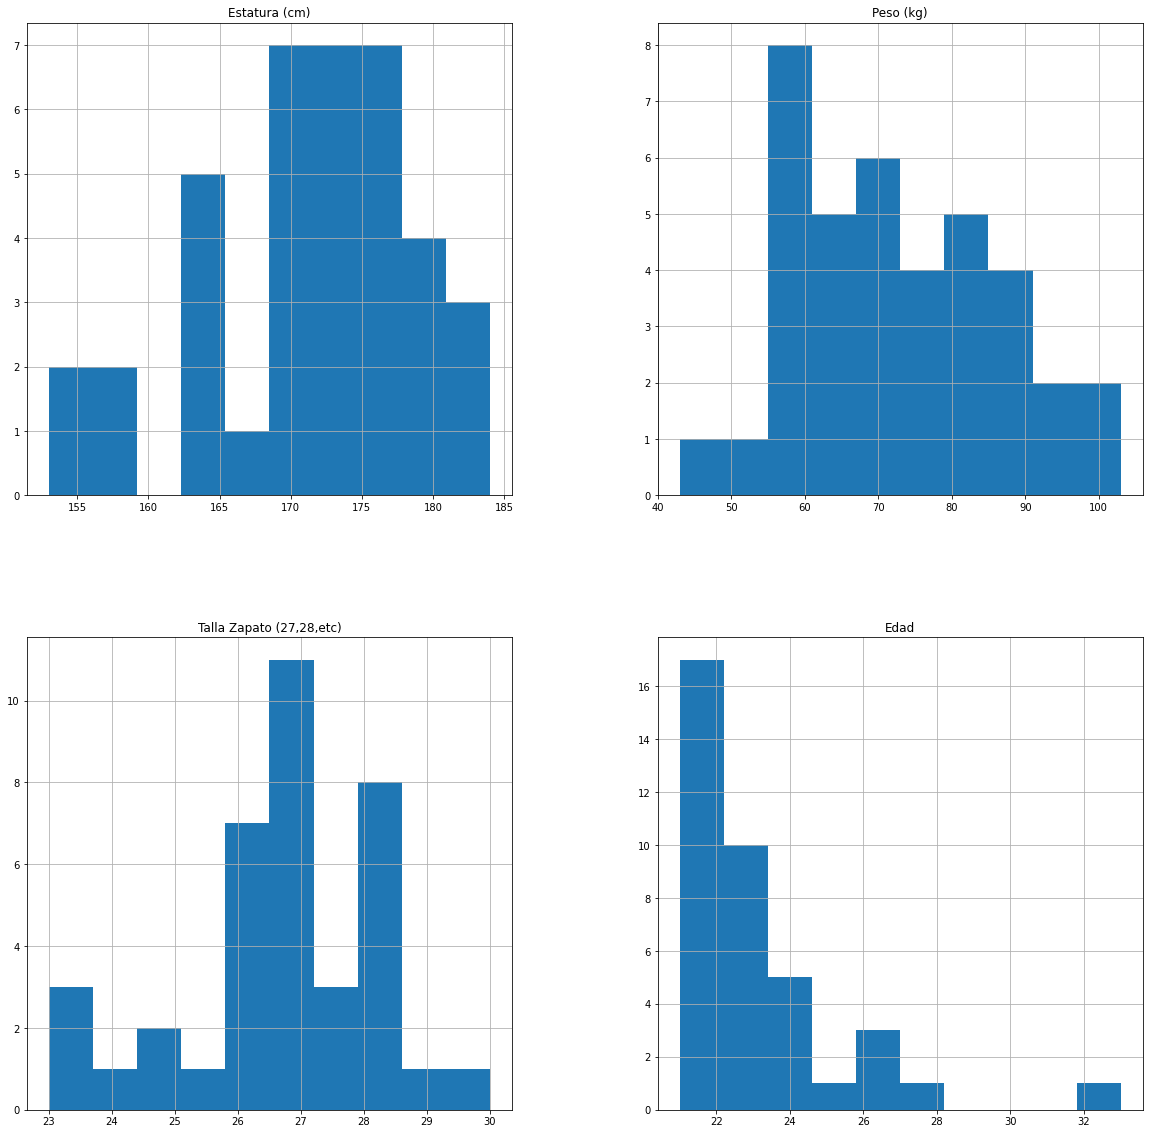

In [19]:
df.hist(figsize=(20,20))

In [18]:
df['Sexo (H,M)'].value_counts()

H    32
M     6
Name: Sexo (H,M), dtype: int64

## Reducción de Dimensiones

### Definición de escala de variables

In [35]:
varc = [v for v in df.columns if v!='Sexo (H,M)']
vard = ['Sexo (H,M)']

### Matriz de Trabajo

In [37]:
X = df[varc].copy()

In [38]:
X.head()

,Estatura (cm),Peso (kg),"Talla Zapato (27,28,etc)",Edad
0,180,84,28.0,21
1,172,80,27.0,23
2,170,60,26.0,21
3,165,65,25.5,23
4,154,50,23.5,26


### Análisis de correlación lineal 

$\rho_{x,y}=\frac{Cov(x,y)}{\sigma_x,\sigma_y}$ Coef. de correl. de Pearson

In [39]:
X.corr()

,Estatura (cm),Peso (kg),"Talla Zapato (27,28,etc)",Edad
Estatura (cm),1.000000,0.584003,0.862799,0.120353
Peso (kg),0.584003,1.000000,0.491492,-0.066473
"Talla Zapato (27,28,etc)",0.862799,0.491492,1.000000,0.151861
Edad,0.120353,-0.066473,0.151861,1.000000


In [61]:
parejas = set(["|".join(sorted((a,b))) for a in varc for b in varc if a!=b])

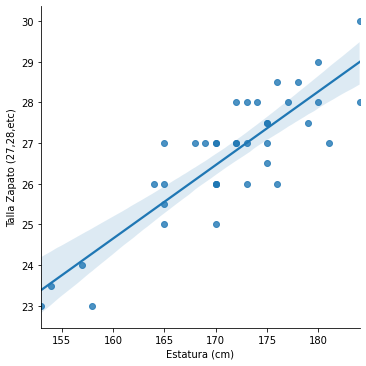

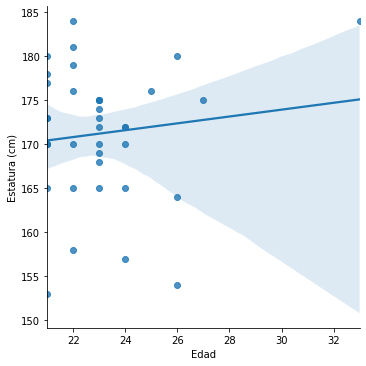

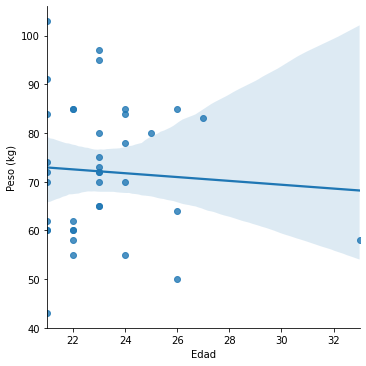

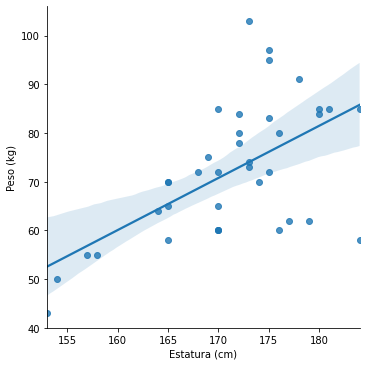

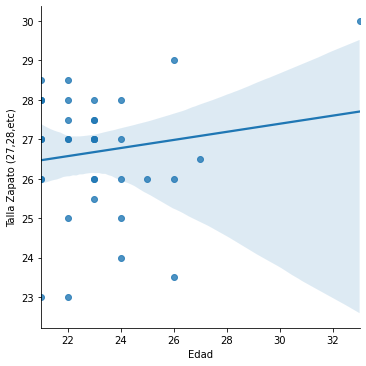

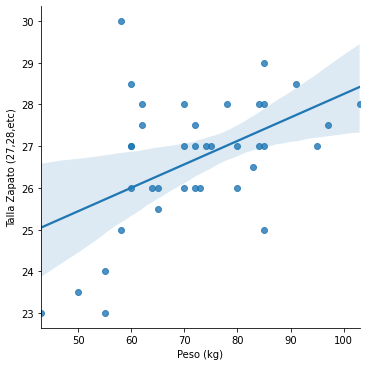

In [63]:
for p in parejas:
    x,y = p.split('|')
    sns.lmplot(data=X,x=x,y=y)

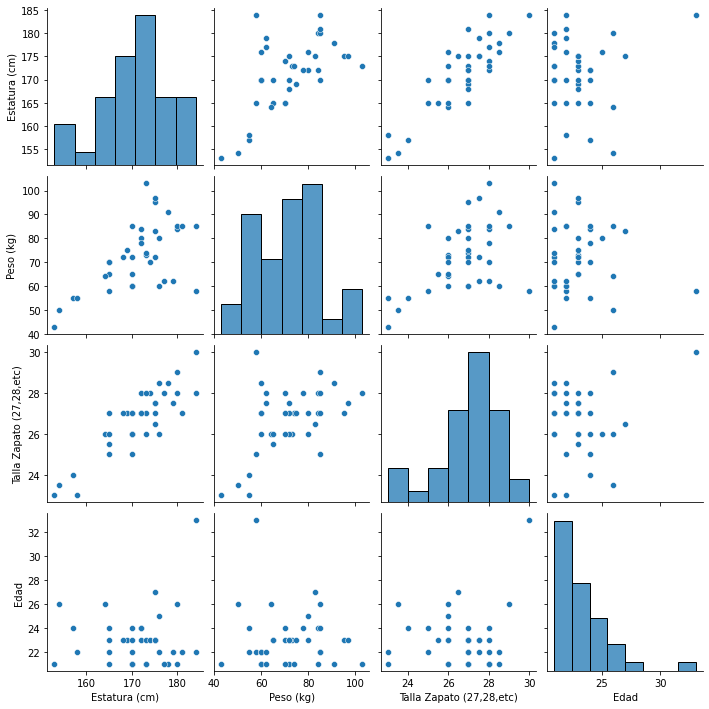

In [64]:
sns.pairplot(data=X)

### Estandarización

In [43]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [46]:
Xs = pd.DataFrame(sc.transform(X),columns=varc)

In [48]:
Xs.head()

,Estatura (cm),Peso (kg),"Talla Zapato (27,28,etc)",Edad
0,1.185925,0.877420,0.849289,-0.909007
1,0.103279,0.582359,0.203829,-0.034519
2,-0.167383,-0.892950,-0.441631,-0.909007
3,-0.844037,-0.524123,-0.764360,-0.034519
4,-2.332675,-1.630604,-2.055280,1.277213


In [49]:
Xs.describe().round(2)

,Estatura (cm),Peso (kg),"Talla Zapato (27,28,etc)",Edad
count,38.00,38.00,38.00,38.00
mean,0.00,-0.00,-0.00,0.00
std,1.01,1.01,1.01,1.01
min,-2.47,-2.15,-2.38,-0.91
25%,-0.40,-0.86,-0.44,-0.80
50%,0.10,-0.01,0.20,-0.03
75%,0.61,0.86,0.77,0.40
max,1.73,2.28,2.14,4.34


### Componentes Principales

In [67]:
pca = PCA()
pca.fit(Xs)

PCA()

In [71]:
pca.explained_variance_ratio_.cumsum()

array([0.57991556, 0.83935706, 0.96769597, 1.        ])

In [73]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['d%d'%(i+1) for i in range(4)])

In [75]:
Xp[vard[0]] = df[vard[0]]

### Visualización en dos dimensiones

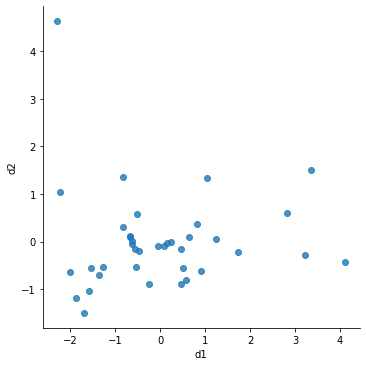

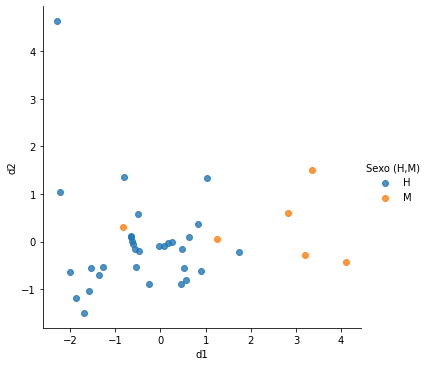

In [79]:
sns.lmplot(data=Xp,x='d1',y='d2',fit_reg=False)
sns.lmplot(data=Xp,x='d1',y='d2',fit_reg=False,hue=vard[0])